In [1]:
import torchvision
from torchvision.datasets import SVHN
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, Subset
import matplotlib.pyplot as plt
import torch.nn.functional as func
from tqdm.notebook import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

## Street view home number (SVHN) dataset
- source: https://www.kaggle.com/datasets/stanfordu/street-view-house-numbers/data
- processed using `preprocessing.py` (via `dump_images_and_labels.sh`)
- note: smaller version of the dataset available directly from torchvision:
```
small_data = SVHN(root='data/', download=True, transform=torchvision.transforms.ToTensor())
```


In [ ]:
### 1.9 GB file
! curl -L --output svhn_test.h5 "https://www.dropbox.com/scl/fi/gbfln2jkxhqjbbnma1urn/svhn_test.h5?rlkey=nzs8gpa9gh8ptwi8iv8zm7y08&dl=1"

In [ ]:
### 4.9 GB file
! curl -L --output svhn_train.h5 "https://www.dropbox.com/scl/fi/z5d3j8camu52xj8260gma/svhn_train.h5?rlkey=4ilsdqhxizykr275jf38uzsem&dl=1"

In [5]:
from dataset import StreetNumberDataset
data_test = StreetNumberDataset('svhn_test.h5', Ndigits=2)
data_train = StreetNumberDataset('svhn_train.h5', Ndigits=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


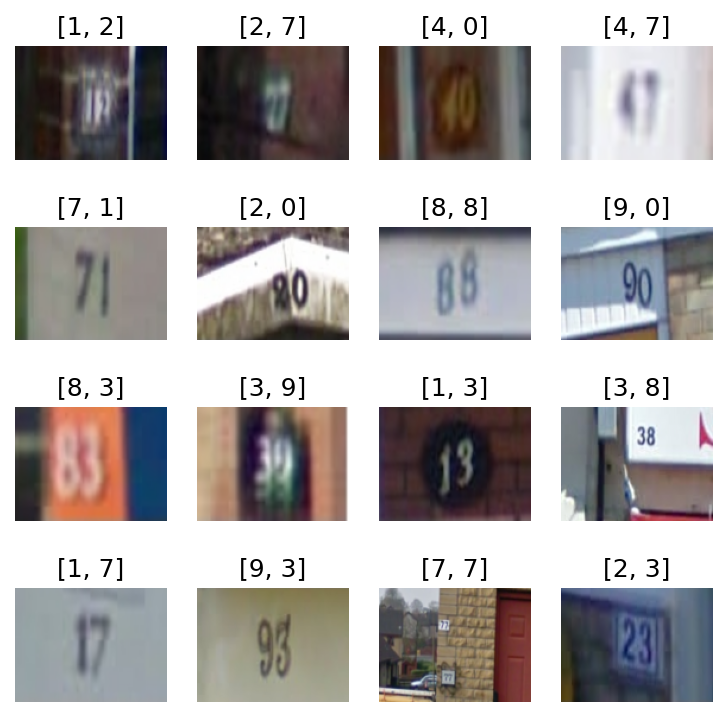

In [6]:
fig, ax = plt.subplots(4,4, figsize=(6,6), dpi=150)

for i in range(16):

    ex_idx = np.random.randint(0, len(data_test))

    img, lab = data_test[ex_idx]

    img *= 255
    ax[i//4][i%4].imshow(img.permute(1,2,0))
    ax[i//4][i%4].axis('off')
    ax[i//4][i%4].set_title(lab.tolist())

In [7]:
train_dl = DataLoader(data_train, batch_size=256, shuffle=True)
valid_dl = DataLoader(data_test, batch_size=256, shuffle=False)

In [8]:
from model import AddressNet

In [9]:
from train import train_valid_loop

## Baseline (no attention)

In [10]:
net_baseline = AddressNet(Ndigits=2, imshape=(3,96,128), do_attention=False)

In [11]:
loss_dict_baseline = train_valid_loop(net_baseline, train_dl, valid_dl, Nepochs=15, learning_rate=1e-3, output_file='saved_model_baseline.pt')

Found GPU!


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 0, Train loss (acc): 4.50396733888438 (0.15441257584114726), Valid loss (acc): 4.339851494991418 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 1, Train loss (acc): 4.402692109766141 (0.16514065085493657), Valid loss (acc): 4.307075919526996 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 2, Train loss (acc): 4.390001283565038 (0.16285162713734141), Valid loss (acc): 4.309669061140581 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 3, Train loss (acc): 4.386889249506131 (0.16348593491450633), Valid loss (acc): 4.2931053132721875 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 4, Train loss (acc): 4.3868574088727925 (0.16243794815223386), Valid loss (acc): 4.299764344186494 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 5, Train loss (acc): 4.387907740095971 (0.16329288472145614), Valid loss (acc): 4.2974005034475615 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 6, Train loss (acc): 4.386477060720954 (0.1633480419194705), Valid loss (acc): 4.297667850147594 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 7, Train loss (acc): 4.385711240096831 (0.16348593491450633), Valid loss (acc): 4.294568769859545 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 8, Train loss (acc): 4.385525045260577 (0.16348593491450633), Valid loss (acc): 4.296820857308128 (0.18645284825275252)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 9, Train loss (acc): 4.385261058807373 (0.16337562051847765), Valid loss (acc): 4.293168674815785 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 10, Train loss (acc): 4.384826122874945 (0.1636238279095422), Valid loss (acc): 4.306308645190614 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 11, Train loss (acc): 4.384539268386196 (0.16447876447876447), Valid loss (acc): 4.301860982721502 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 12, Train loss (acc): 4.384604830137441 (0.16381687810259238), Valid loss (acc): 4.293122537208326 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 13, Train loss (acc): 4.385110250661071 (0.163596249310535), Valid loss (acc): 4.293042240720807 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 14, Train loss (acc): 4.385257707515233 (0.1635410921125207), Valid loss (acc): 4.297275788856275 (0.1838798468166587)


In [12]:
net_baseline.load_state_dict(torch.load('saved_model_baseline.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

## With attention

In [13]:
# net_attention = AddressNet(Ndigits=1, imshape=(3,32,32), do_attention=True)
net_attention = AddressNet(Ndigits=2, imshape=(3,96,128), do_attention=True)

In [14]:
loss_dict_attention = train_valid_loop(net_attention, train_dl, valid_dl, Nepochs=15, learning_rate=1e-3, output_file='saved_model_attention.pt')

Found GPU!


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 0, Train loss (acc): 4.560941286489997 (0.1310535024820739), Valid loss (acc): 4.341728340495717 (0.17155337482048827)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 1, Train loss (acc): 4.3984340412515985 (0.161003861003861), Valid loss (acc): 4.294950918717817 (0.18405935854475824)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 2, Train loss (acc): 4.387393508158939 (0.162134583563155), Valid loss (acc): 4.291943911350135 (0.1904619435136429)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 3, Train loss (acc): 4.387341835129429 (0.1611969111969112), Valid loss (acc): 4.306401310545025 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 4, Train loss (acc): 4.386470008903826 (0.1619415333701048), Valid loss (acc): 4.29311703190659 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 5, Train loss (acc): 4.3846392362890105 (0.16326530612244897), Valid loss (acc): 4.307288444403446 (0.18190521780756344)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 6, Train loss (acc): 4.385048120794162 (0.16180364037506895), Valid loss (acc): 4.294880809205951 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 7, Train loss (acc): 4.385072466353296 (0.1626034197462769), Valid loss (acc): 4.29329759424383 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 8, Train loss (acc): 4.385151775789932 (0.1642581356867071), Valid loss (acc): 4.30715325384429 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 9, Train loss (acc): 4.384579087646914 (0.1627964699393271), Valid loss (acc): 4.300340941458037 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 10, Train loss (acc): 4.385553010752504 (0.1622173193601765), Valid loss (acc): 4.293363730112712 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 11, Train loss (acc): 4.384185777583593 (0.16376172090457805), Valid loss (acc): 4.297233234752309 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 12, Train loss (acc): 4.384991054803553 (0.1627964699393271), Valid loss (acc): 4.315146388429584 (0.18393968405935854)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 13, Train loss (acc): 4.384637006571595 (0.16423055708769996), Valid loss (acc): 4.291708137049819 (0.1959669698420297)


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Epoch: 14, Train loss (acc): 4.384930402460233 (0.16196911196911196), Valid loss (acc): 4.300377181082061 (0.18393968405935854)


In [15]:
net_attention.load_state_dict(torch.load('saved_model_attention.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

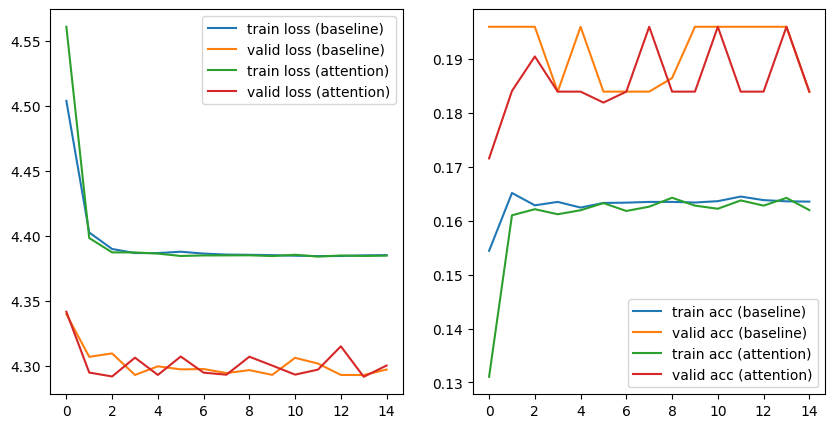

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(range(len(loss_dict_baseline['train_loss'])),loss_dict_baseline['train_loss'],label='train loss (baseline)')
axes[0].plot(range(len(loss_dict_baseline['valid_loss'])),loss_dict_baseline['valid_loss'],label='valid loss (baseline)')
axes[1].plot(range(len(loss_dict_baseline['train_acc'])),loss_dict_baseline['train_acc'],label='train acc (baseline)')
axes[1].plot(range(len(loss_dict_baseline['valid_acc'])),loss_dict_baseline['valid_acc'],label='valid acc (baseline)')
axes[0].plot(range(len(loss_dict_attention['train_loss'])),loss_dict_attention['train_loss'],label='train loss (attention)')
axes[0].plot(range(len(loss_dict_attention['valid_loss'])),loss_dict_attention['valid_loss'],label='valid loss (attention)')
axes[1].plot(range(len(loss_dict_attention['train_acc'])),loss_dict_attention['train_acc'],label='train acc (attention)')
axes[1].plot(range(len(loss_dict_attention['valid_acc'])),loss_dict_attention['valid_acc'],label='valid acc (attention)')
#axes.set_yscale('log')
#axes.set_ylim([1e-2,1e0])
axes[0].legend()
axes[1].legend()
plt.show()

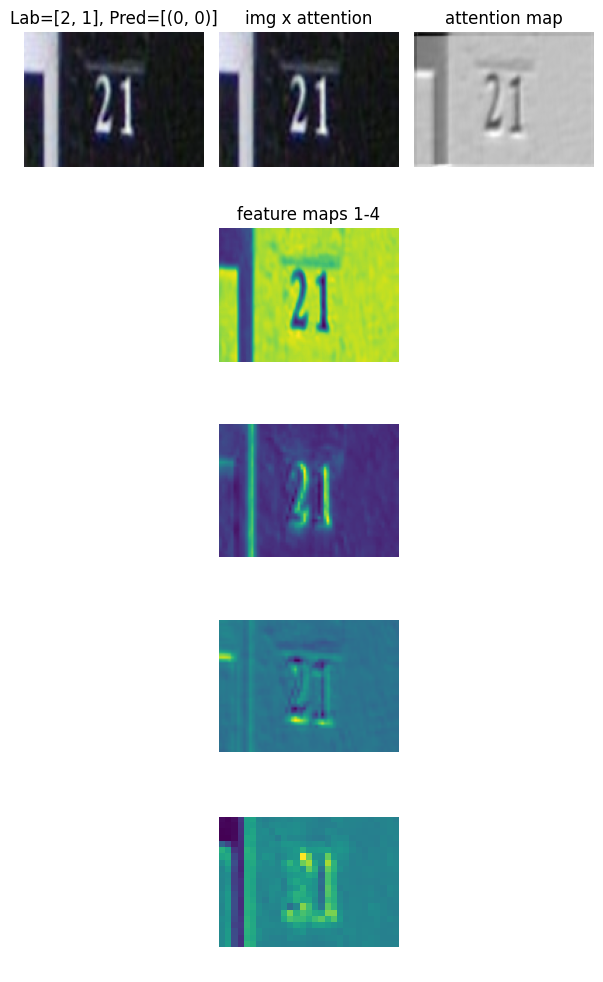

In [21]:
do_attention = True
if do_attention:
    net = net_attention
else:
    net = net_baseline

ex = np.random.randint(len(data_test))
ex,lab = data_test[ex]
ex = ex.unsqueeze(0)

pred = net(ex).detach()

if do_attention:
    ex0 = ex.clone()
    ex = net.SpatialGate(ex).detach()
    scale = ex/ex0

feats1  = net.f1(ex).detach()
feats2  = net.f2(feats1).detach()
feats3  = net.f3(feats2).detach()
feats4  = net.f4(feats3).detach()

if net.Ndigits > 1:
    pred_dig0 = torch.argmax(pred[0,0]).squeeze(0)
    pred_dig1 = torch.argmax(pred[0,1]).squeeze(0)
    pred_dig = [pred_dig0,pred_dig1]
else:
    pred_dig = torch.argmax(pred[0]).squeeze(0)

fig, axes = plt.subplots(5,3,figsize=(6,10))

if do_attention:

    renormalize = lambda x: (x-x.min())/(x.max()-x.min())

    axes[0,0].imshow(renormalize(ex0.squeeze(0).permute(1,2,0)))
    axes[0,1].imshow(renormalize(ex.squeeze(0).permute(1,2,0)))
    axes[0,1].set_title('img x attention')
    axes[0,2].imshow(renormalize(scale.squeeze(0).permute(1,2,0)))
    axes[0,2].set_title('attention map')
else:
    axes[0,0].imshow(ex.squeeze(0).permute(1,2,0))


### Feature maps
axes[1,1].imshow(torch.sum(feats1.squeeze(0).permute(1,2,0),dim=-1))
axes[2,1].imshow(torch.sum(feats2.squeeze(0).permute(1,2,0),dim=-1))
axes[3,1].imshow(torch.sum(feats3.squeeze(0).permute(1,2,0),dim=-1))
axes[4,1].imshow(torch.sum(feats4.squeeze(0).permute(1,2,0),dim=-1))

axes[0,0].set_title(f'Lab={lab.tolist()}, Pred=[{pred_dig[0].item(),pred_dig[1].item()}]')
axes[1,1].set_title('feature maps 1-4')

for ax in axes.flatten():
    ax.axis('off')

fig.tight_layout()
